In [1]:
from __future__ import print_function

import numpy as np
import numpy as np
import pandas as pd
import scipy
from matplotlib import pyplot as plt
import csv
from sklearn import metrics
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import OrthogonalMatchingPursuitCV
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn import metrics
from sklearn.preprocessing import normalize
from scipy.sparse import coo_matrix
from sklearn.utils import resample
import time
from sklearn.cluster import KMeans
from scipy.stats import pearsonr
from sklearn.cluster import AgglomerativeClustering
import sklearn

Matplotlib is building the font cache using fc-list. This may take a moment.


In [2]:
D = np.load("D3.npy")

In [3]:
D_test = np.load("dict_sub3_l1b.npy")

FileNotFoundError: [Errno 2] No such file or directory: 'dict_sub3_l1b.npy'

In [4]:
D.shape

(240, 1080)

In [5]:
D.shape
D1 = np.transpose(D)
D1.shape

(1080, 240)

In [6]:
def calculate_accuracy(Xts, yts, D, minimum):
    y_pred1 = []
    y_pred2 = []
    y_pred3 = []
    y_pred4 = []
    diff = []
    class1_avg = 0
    class2_avg = 0
    class3_avg = 0
    class4_avg = 0
    counter1 = 0
    
    #print(D.shape)
    
    for i in range(len(Xts)):
        features = Xts[i]

        omp = OrthogonalMatchingPursuit(n_nonzero_coefs=30)
        omp.fit(D, features)
        coef = omp.coef_

        s1 = 0
        s2 = 0
        s3 = 0
        s4 = 0

        l1 = 0
        l2 = 0
        l3 = 0
        l4 = 0

        a1 = 0
        a2 = 0
        a3 = 0
        a4 = 0

        list1 = coef[0:minimum]
        list2 = coef[minimum:2 * minimum]
        list3 = coef[2 * minimum:3 * minimum]
        list4 = coef[3 * minimum:4 * minimum]

        c1 = (sum(z * z for z in list1))**(1 / 2.0)
        c2 = (sum(z * z for z in list2))**(1 / 2.0)
        c3 = (sum(z * z for z in list3))**(1 / 2.0)
        c4 = (sum(z * z for z in list4))**(1 / 2.0)

        s1 = np.std(list1)
        s2 = np.std(list2)
        s3 = np.std(list3)
        s4 = np.std(list4)

        a1 = max(list1)
        a2 = max(list2)
        a3 = max(list3)
        a4 = max(list4)

        for i1 in range(minimum):
            l1 = l1 + coef[i1]

        for i1 in range(minimum, 2 * minimum):
            l2 = l2 + coef[i1]

        for i1 in range(2 * minimum, 3 * minimum):
            l3 = l3 + coef[i1]

        for i1 in range(3 * minimum, 4 * minimum):
            l4 = l4 + coef[i1]

        if s1 >= s2 and s1 >= s3 and s1 >= s4:
            y_pred1.append(0)
        elif s2 >= s1 and s2 >= s3 and s2 >= s4:
            y_pred1.append(1)
        elif s3 >= s1 and s3 >= s2 and s3 >= s4:
            y_pred1.append(2)
        else:
            y_pred1.append(3)
            if (yts[i] == 2):
                if (counter1 == 0):
                    counter1 += 1
                    idx_r, = coef.nonzero()

        if l1 >= l2 and l1 >= l3 and l1 >= l4:
            y_pred2.append(0)
        elif l2 >= l1 and l2 >= l3 and l2 >= l4:
            y_pred2.append(1)
        elif l3 >= l1 and l3 >= l2 and l3 >= l4:
            y_pred2.append(2)
        else:
            y_pred2.append(3)

        if a1 >= a2 and a1 >= a3 and a1 >= a4:
            y_pred3.append(0)
        elif a2 >= a1 and a2 >= a3 and a2 >= a4:
            y_pred3.append(1)
        elif a3 >= a1 and a3 >= a2 and a3 >= a4:
            y_pred3.append(2)
        else:
            y_pred3.append(3)

        if c1 >= c2 and c1 >= c3 and c1 >= c4:
            y_pred4.append(0)
        elif c2 >= c1 and c2 >= c3 and c2 >= c4:
            y_pred4.append(1)
        elif c3 >= c1 and c3 >= c2 and c3 >= c4:
            y_pred4.append(2)
        else:
            y_pred4.append(3)
    
    class1_avg += metrics.accuracy_score(
        yts, y_pred4, normalize=True, sample_weight=None)
    class2_avg += metrics.accuracy_score(
        yts, y_pred3, normalize=True, sample_weight=None)
    class3_avg += metrics.accuracy_score(
        yts, y_pred1, normalize=True, sample_weight=None)
    class4_avg += metrics.accuracy_score(
        yts, y_pred2, normalize=True, sample_weight=None)

    return y_pred4, y_pred3, y_pred1, y_pred2, class1_avg, class2_avg, class3_avg, class4_avg

In [7]:
r = 600
y_test3 = np.zeros((r*4,))
for i in range(r*4):
    if i<r: y_test3[i]=0
    elif i<r*2: y_test3[i]=1
    elif i<r*3: y_test3[i]=2
    else: y_test3[i]=3
y_test3.shape

(2400,)

In [8]:
# dict = sub1  test cases are of sub1
y_classifier1, y_classifier2, y_classifier3, y_classifier4, a1, a2, a3, a4 = calculate_accuracy(
    D_test, y_test3.reshape(-1,1), np.transpose(D1), int(1080/4))
print((a1+a2+a3+a4) / 4)
print('class1:', a1)
print('class2:', a2)
print('class3:', a3)
print('class4:', a4)

NameError: name 'D_test' is not defined

In [52]:
start_time = time.time()
# y_classifier1,y_classifier2,y_classifier3,y_classifier4, a1,a2,a3,a4 = calculate_accuracy(
#     np.reshape(X_test[0],(1,-1)), np.reshape(y_test[0],(1,-1)),reb_dictionary,class1,class2,5)
y_classifier1, y_classifier2, y_classifier3, y_classifier4, a1, a2, a3, a4 = calculate_accuracy(
    np.reshape(D_test[0],(1,-1)), np.reshape(y_test3.reshape(-1,1)[0],(1,-1)), np.transpose(D1), int(1080/4))
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.018755674362182617 seconds ---


In [13]:
# y_test3, y_classifier1

In [10]:
array = sklearn.metrics.confusion_matrix(y_test3, y_classifier1, labels=None, sample_weight=None)

df_cm = pd.DataFrame(array, index = [i for i in "ABCD"], columns = [i for i in "ABCD"])

plt.matshow(df_cm)
# sn.heatmap(df_cm, annot=True)

In [37]:
class_names = np.array(["0","1","2","3"])

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[549  11  18  22]
 [ 16 560  15   9]
 [ 19  10 564   7]
 [ 10  16  11 563]]
Normalized confusion matrix
[[0.92 0.02 0.03 0.04]
 [0.03 0.93 0.03 0.01]
 [0.03 0.02 0.94 0.01]
 [0.02 0.03 0.02 0.94]]


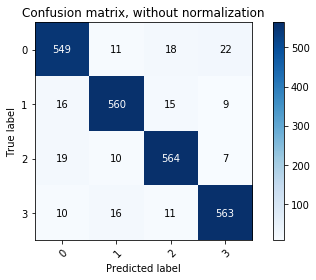

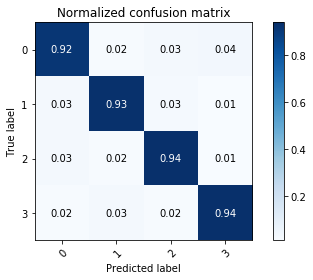

In [46]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test3, y_classifier1, classes=class_names)#,
                      #title='Confusion matrix, without normalization')
# plt.savefig("small_conf_mat_lc_ksvd_sub3_multi_.png",quality=95)

# Plot normalized confusion matrix
plot_confusion_matrix(y_test3, y_classifier1, classes=class_names, normalize=True)#,
                      #title='Normalized confusion matrix')

# plt.savefig("small_conf_mat_lc_ksvd_sub3_multi_norm.png",quality=95)
plt.show()

<Figure size 432x288 with 0 Axes>

In [28]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[549  11  18  22]
 [ 16 560  15   9]
 [ 19  10 564   7]
 [ 10  16  11 563]]
Normalized confusion matrix
[[0.92 0.02 0.03 0.04]
 [0.03 0.93 0.03 0.01]
 [0.03 0.02 0.94 0.01]
 [0.02 0.03 0.02 0.94]]


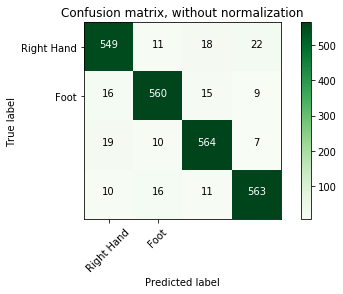

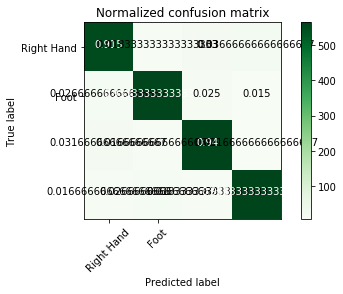

In [30]:
##PLOT CONFUSION MATRIX
cnf_matrix = confusion_matrix(y_test3, y_classifier1)
np.set_printoptions(precision=2)
class_names = ["Right Hand","Foot"]

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,title='Normalized confusion matrix')
plt.show()

In [31]:
#calculate score
y_final_test = y_test3
y_all1 = y_classifier1
from sklearn.metrics import f1_score
y_score = f1_score(y_final_test, y_all1, average=None)

In [32]:
y_score

array([0.92, 0.94, 0.93, 0.94])

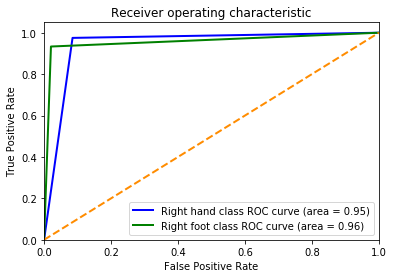

In [48]:
## Plot ROC curve

count = 0
iterator = 0
real0 = []
pred0 = []

real1 = []
pred1 = []


real2 = []
pred2 = []


real3 = []
pred3 = []

while(iterator < len(y_final_test)):
    if(y_final_test[iterator] == 0):
        real0.append(0)
        if(y_all1[iterator] == 0):
            pred0.append(0)
        else:
            pred0.append(1)
    else:
        real0.append(1)
        if(y_all1[iterator] == 0):
            pred0.append(0)
        else:
            pred0.append(1)
    iterator += 1
    
iterator = 0
while(iterator < len(y_final_test)):
    if(y_final_test[iterator] == 1):
        real1.append(1)
        if(y_all1[iterator] == 1):
            pred1.append(1)
        else:
            pred1.append(0)
    else:
        real1.append(0)
        if(y_all1[iterator] == 1):
            pred1.append(1)
        else:
            pred1.append(0)
    iterator += 1
    
    


import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

fpr, tpr, _ = roc_curve(real0, pred0)
roc_auc = auc(fpr, tpr)

fpr1, tpr1, _ = roc_curve(real1, pred1)
roc_auc1 = auc(fpr1, tpr1)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='blue',
         lw=lw, label='Right hand class ROC curve (area = %0.2f)' % roc_auc)

plt.plot(fpr1, tpr1, color='green',
         lw=lw, label='Right foot class ROC curve (area = %0.2f)' % roc_auc1)

plt.plot([0, 1], [0, 1], color='darkorange', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig("roc_lc_ksvd_sub3_multi_.png",dpi=400,quality=95)
plt.show()

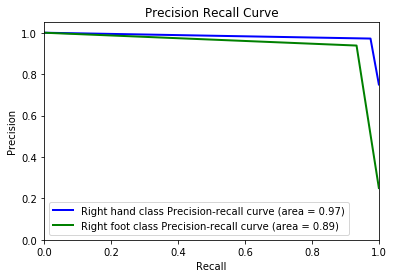

In [50]:
## Plot precision recall curve

import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


# Compute Precision-Recall and plot curve
precision = []
recall = []
average_precision = []

precision, recall,thresholds = precision_recall_curve(real0,pred0)

average_precision = average_precision_score(real0,pred0)


precision1, recall1,thresholds1 = precision_recall_curve(real1,pred1)

average_precision1 = average_precision_score(real1,pred1)


# Plot Precision-Recall curve
plt.clf()
plt.plot(recall, precision, lw=lw, color='blue', label='Right hand class Precision-recall curve (area = {0:0.2f})'
                   ''.format(average_precision))

plt.plot(recall1, precision1, lw=lw, color='green', label='Right foot class Precision-recall curve (area = {0:0.2f})'
                   ''.format(average_precision1))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title("Precision Recall Curve")

plt.legend(loc="lower left")
# plt.savefig("small_precision_recall_curve_lc_ksvd_sub3_multi_.png",quality=95)
plt.show()
